# Customer Churn Prediction

This notebooks looks into the implementation of a end-to-end Data Science framework in an attempt to predict if a customer will churn from a bank based on its attributes.

The approach is as follows:

1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem definition

We are asked to do the following: 

* Identify and visualize which factors contribute to customer churn:

* Build a prediction model that will perform the following:
    * Classify if a customer is going to churn or not
    * Preferably and based on model performance, choose a model that will attach a probability to the churn to make it easier for customer service to target low hanging fruits in their efforts to prevent churn

## 2. Data 

The data used in this project can be found [here](https://www.kaggle.com/code/kmalit/bank-customer-churn-prediction/data). It has 10,000 samples of features of bank customers who exited or not their bank and details about their account.

## 3. Evaluation

As this is a classification problem. We will get a 0.82 auc score or higher to claim that we were successful.



## 4. Features

### 4.1. Features description: 

Let us describe the features of the data:

* **Row Number:** Number of the sample
* **CustomerId:** Customer unique ID in the bank database
* **Surname:** Lastname of the customer
* **CreditScore:** Credit score of the customer
* **Geography:** Country of residence of the customer
* **Gender:** Sex of the customer (Male or Female)
* **Age:** Age of the customer in years
* **Tenure:** Number of properties of the customer
* **Balance:** Total balance in Euros in the customer's account
* **NumOfProducts:** Number of products the customer has with the bank
* **HasCrCard:** Whether or not the customer has a credit card with the bank
* **IsActiveMember:** Whether or not the customer has made any transaction in the last 30 days (Not sure about this one)
* **EstimatedSalary:** Estimated yeadrly salary of the customer in Euros
* **Exited:** Whether or not the customer exited the bank

### 4.2. Importing our tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Let's import the data and have a look at some rows:

In [2]:
data = pd.read_csv("data/Churn_Modelling.csv")
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 4.3. Exploring the data

Let's see how many rows we have in the dataset:

In [3]:
len(data)

10000

Let's check if there are any missing values:

In [4]:
data.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

No missing values at all!

Now we could drop some columns that will not be useful for the analysis. These columns are:
* `RowNumber`
* `CustomerId`
* `Surname`

In [5]:
data.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### 4.4. Exploratory Data Analysis:

Let's separate the categorical columns from the numerical columns. Keep in mind that columns with discrete values may be considered as categorical:

Categorical: 
* `Geography`
* `Gender`
* `NumOfProducts`
* `HasCrCard`
* `IsActiveMember`

Numerical:
* `CreditScore`
* `Age`
* `Tenure`
* `Balance`
* `EstimatedSalary`

In this case our target variable is the column `Exited`.

In [6]:
categorical_columns = ["Geography", "Gender", "NumOfProducts", "HasCrCard", "IsActiveMember"]
numerical_columns = ["CreditScore", "Age", "Tenure", "Balance", "EstimatedSalary"]

Now let's visualize the distribution of our data according to the target `Exited`:

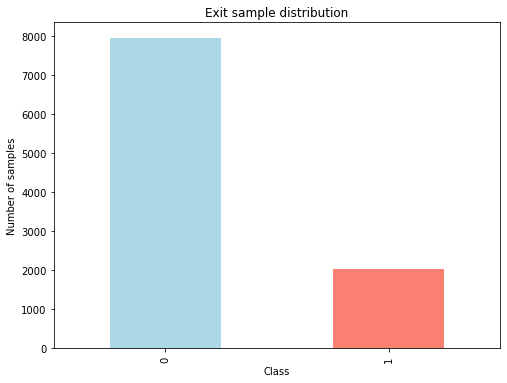

In [7]:
fig, ax = plt.subplots(figsize=(8,6))
data["Exited"].value_counts().plot(kind="bar",
                                   color=["lightblue", "salmon"],
                                   ax=ax)

ax.set(title="Exit sample distribution",
       xlabel="Class",
       ylabel="Number of samples");

The graph above tells us that the classes are imbalanced in approximately a 1:4 ratio. That is, for 1 class there are 4 times as much samples as in the other class. This project is an interesting case since we will be able to explore several techniques to account for class imbalance.

Now let's visualize the relation between the categorical features and the target:

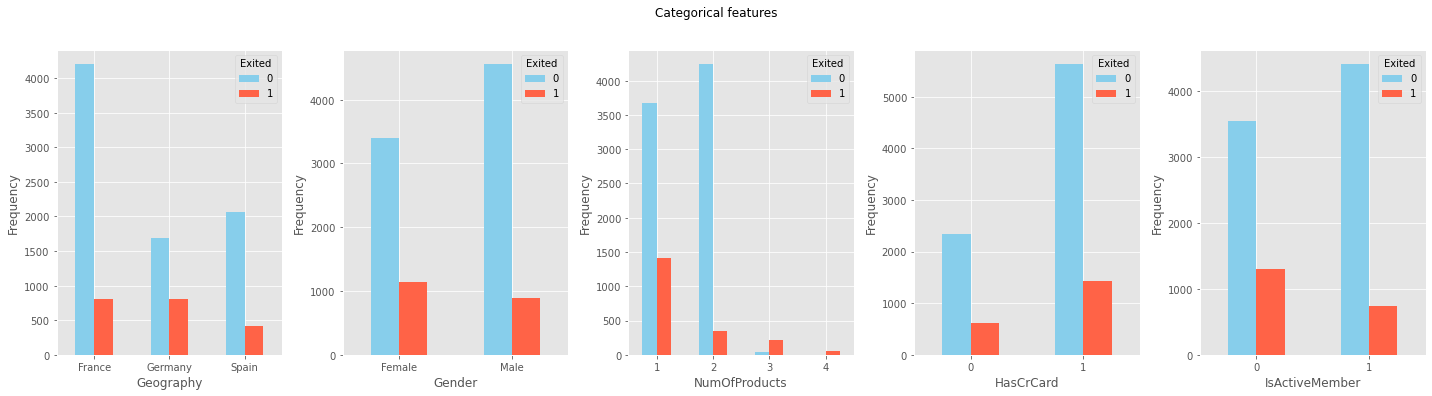

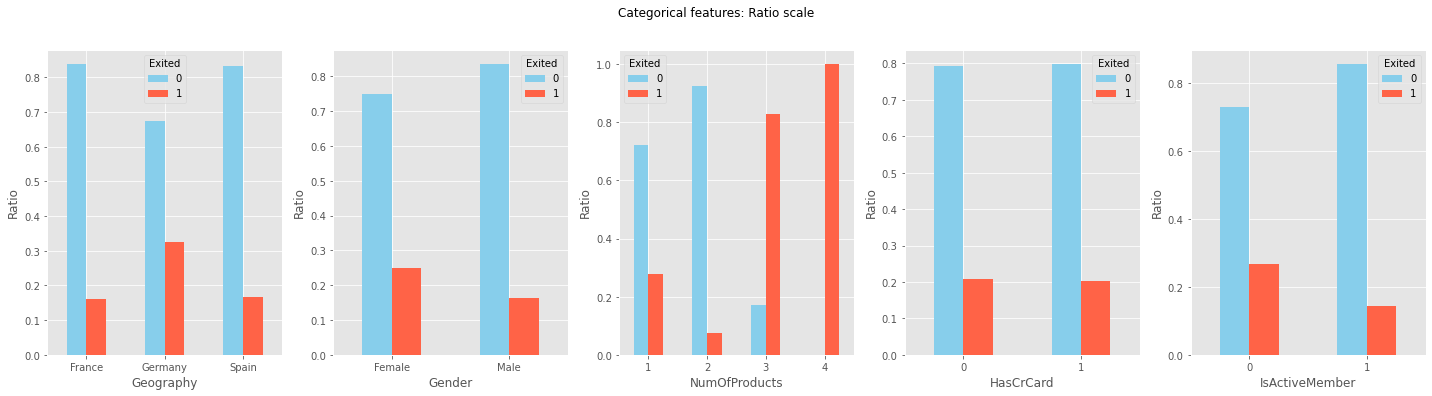

In [8]:
plt.style.use("ggplot")

fig = plt.figure(figsize=(20,10))

for i in range(len(categorical_columns)):
    column = categorical_columns[i]
    sub = fig.add_subplot(2, 5, i + 1)
    pd.crosstab(data[column],data["Exited"]).plot(kind="bar", 
                                                  color= ["skyblue", "tomato"], 
                                                  ax=sub, 
                                                  ylabel="Frequency")
    plt.xticks(rotation=0)
plt.tight_layout(h_pad=1.0)
plt.subplots_adjust(top=0.92)
fig.suptitle("Categorical features");

fig1 = plt.figure(figsize=(20,10))

for i in range(len(categorical_columns)):
    column = categorical_columns[i]
    sub = fig1.add_subplot(2, 5, i + 1)
    normalized = pd.crosstab(data["Exited"],data[column])/pd.crosstab(data["Exited"],data[column]).sum()
    normalized.T.plot(kind="bar",
                      color= ["skyblue", "tomato"], 
                      ax=sub,
                      ylabel="Ratio")
    plt.xticks(rotation=0)

plt.tight_layout(h_pad=1.0)
plt.subplots_adjust(top=0.92)
fig1.suptitle("Categorical features: Ratio scale");


<AxesSubplot:xlabel='Gender', ylabel='Ratio'>

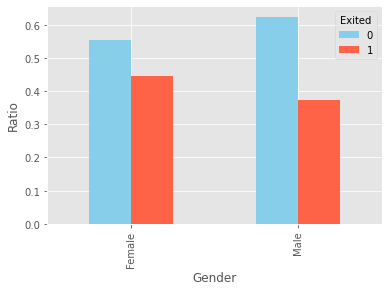

In [9]:
data_t = data[(data["Geography"] == "Germany") & (data["IsActiveMember"] == 0)]
normalized = pd.crosstab(data_t["Exited"],data_t["Gender"])/pd.crosstab(data_t["Exited"],data_t["Gender"]).sum()
normalized.T.plot(kind="bar",
                    color= ["skyblue", "tomato"], 
                    ylabel="Ratio")

In [10]:
data_t =  data[(data["Geography"] == "Germany") & (data["NumOfProducts"] == 3)]
data_t

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
227,547,Germany,Female,39,6,74596.15,3,1,1,85746.52,1
237,539,Germany,Female,43,3,116220.50,3,1,0,55803.96,1
271,733,Germany,Male,34,3,100337.96,3,1,0,48559.19,1
376,745,Germany,Male,45,10,117231.63,3,1,1,122381.02,1
413,693,Germany,Female,41,9,181461.48,3,1,1,187929.43,1
...,...,...,...,...,...,...,...,...,...,...,...
9438,701,Germany,Male,63,3,120916.52,3,0,0,144727.45,1
9716,812,Germany,Male,39,5,115730.71,3,1,1,185599.34,1
9747,610,Germany,Female,69,5,86038.21,3,0,0,192743.06,1
9877,505,Germany,Female,33,3,106506.77,3,1,0,45445.78,1


From the previous charts one could extract very interesting information. For instance:
* For the `Geography` feature we can see that it is almost twice as likely for a customer to exit the bank if he is from Germany as if he is from Spain or France.
* Regarding `Gender`, the females seem more likely to exit the bank than the males.
* The number of products a customer seems to be a strong indicator of the customer churning in the future. The higher the number of products the more likely the customer will exit the bank. However, we need to be careful because the customers with 3 or 4 products may be outliers.
* The customer exiting the bank seems not to be affected by whether or not the customer has a credit card.
* Looks like the customers that are not active members are more likely to churn.

Now let's visualize the relation between the numerical features and the target:

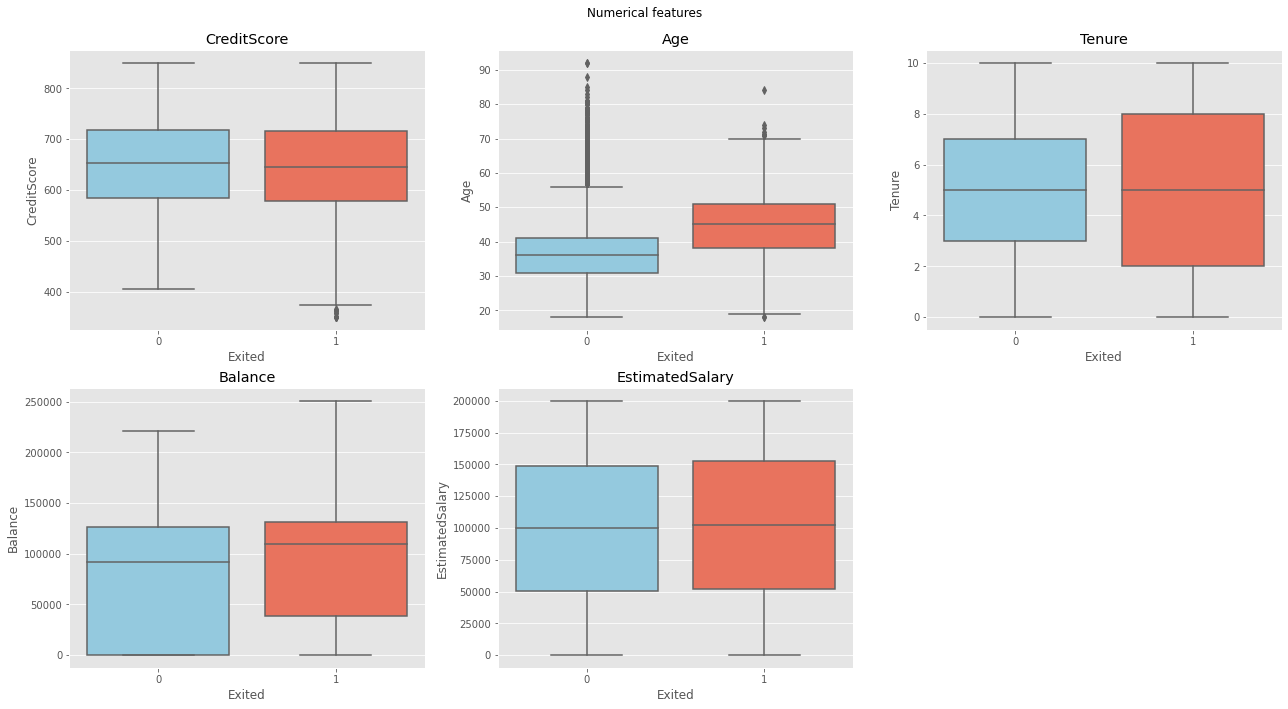

In [11]:
import seaborn as sns
fig2 = plt.figure(figsize=(18,10))

for i in range(len(numerical_columns)):
    column = numerical_columns[i]
    sub = fig2.add_subplot(2, 3, i + 1)
    sns.boxplot(x = "Exited", y = column, data = data, palette={0: "skyblue", 1: "tomato"}, ax=sub)
    sub.set_title(column)
plt.tight_layout(h_pad=1.0)
plt.subplots_adjust(top=0.92)
fig2.suptitle("Numerical features");

### 4.5. Encoding

Let's proceed to represent all the data in a numeric format so that we can fit some models with it.

In [12]:
from pandas.api.types import is_string_dtype
columns_to_encode = [col for col in data.columns if is_string_dtype(data[col])]
columns_to_encode

['Geography', 'Gender']

Three ways to encode:
1. Manually (Better to use when categories are ordinal, and order is desired to be preserved)

2. Using pandas functionality (Better to use when categories are nominal and have a high cardinality).

3. Try one-hot for `Geography` (Better to use when categories are nominal and have a low cardinality).

1. Manually

In [13]:
encoding_map = {"Geography": {"France": 0, "Spain": 1, "Germany": 2},
                "Gender": {"Female": 0, "Male": 1}}   
data_manual_enc = data.copy()      
data_manual_enc = data_manual_enc.replace(encoding_map)
data_manual_enc.head()       

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,1,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,1,0,43,2,125510.82,1,1,1,79084.10,0


2. Pandas functionality

In [14]:
data_pandas_enc = data.copy() 
data_pandas_enc[columns_to_encode] = data_pandas_enc[columns_to_encode].astype("category")
data_pandas_enc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   CreditScore      10000 non-null  int64   
 1   Geography        10000 non-null  category
 2   Gender           10000 non-null  category
 3   Age              10000 non-null  int64   
 4   Tenure           10000 non-null  int64   
 5   Balance          10000 non-null  float64 
 6   NumOfProducts    10000 non-null  int64   
 7   HasCrCard        10000 non-null  int64   
 8   IsActiveMember   10000 non-null  int64   
 9   EstimatedSalary  10000 non-null  float64 
 10  Exited           10000 non-null  int64   
dtypes: category(2), float64(2), int64(7)
memory usage: 723.0 KB


In [15]:
for col in columns_to_encode:
    data_pandas_enc[col] = data_pandas_enc[col].cat.codes
data_pandas_enc.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0


3. One-hot encoding for `Geography`

In [16]:
data_oh = data.copy() 
data_oh = data_oh.replace(encoding_map["Gender"])

In [17]:
data_oh = pd.get_dummies(data_oh)

In [18]:
data_oh.drop("Exited", axis=1, inplace=True)
data_oh["Exited"] = data["Exited"]
data_oh.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0,1
3,699,0,39,1,0.00,2,0,0,93826.63,1,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1,0


### 4.6. Check correlation

Now that all the features have a numerical format. Let's check the relationships through the correlation matrix

In [19]:
data_ = data_manual_enc.copy()

<AxesSubplot:>

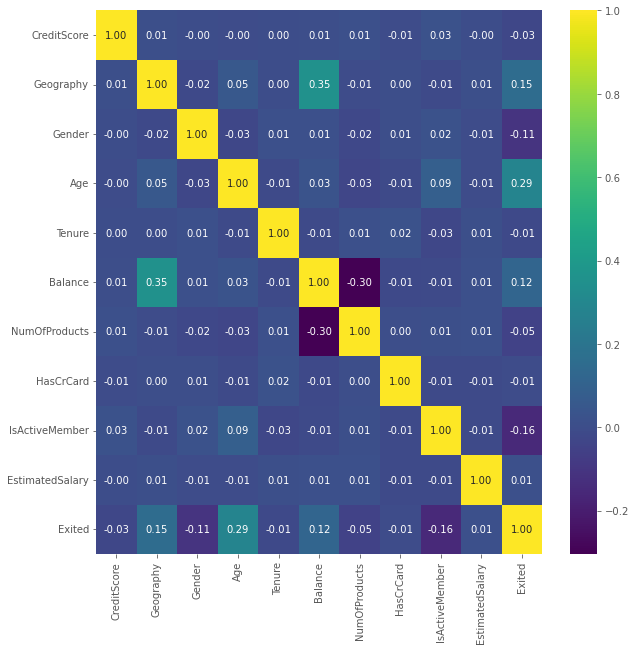

In [20]:
fig, ax = plt.subplots(figsize=(10,10))
data_centered = data_[(data_["Age"] > data_["Age"].quantile(0.1)) & (data_["Age"] < data_["Age"].quantile(0.9))]
correlation = data_.corr()
sns.heatmap(correlation, cmap="viridis", annot=True, fmt=".2f")

<AxesSubplot:>

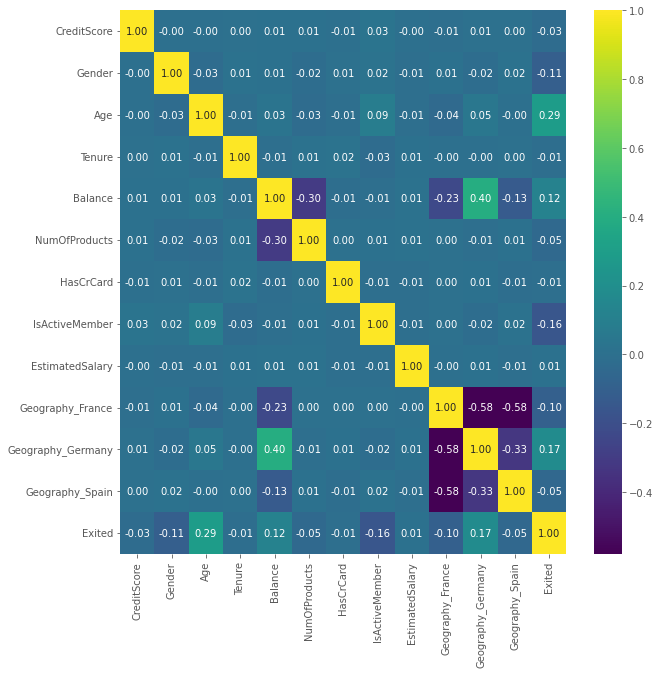

In [21]:
fig, ax = plt.subplots(figsize=(10,10))
data_centered = data_oh[(data_oh["Age"] > data_oh["Age"].quantile(0.1)) & (data_oh["Age"] < data_oh["Age"].quantile(0.9))]
correlation = data_oh.corr()
sns.heatmap(correlation, cmap="viridis", annot=True, fmt=".2f")

From the correlation matrix, one can see very interting things. For instance:
* There seems to be a high correlation between the `Balance` and the `Geography` features. Which could mean that for certain countries, the balance of the accounts is greater than for other countries. It actually comes down to the way the `Geography` feature was encoded. We will go deeper into this later. All the accounts from Germany have a balance greater than 0 EUR as opposed to the accounts from Spain or France. If the bank benefits from having accounts with high balance, then it should focus on the customers from Germany, apart from Germany being the country with the highest churning ratio (1:3). That is, 1 out of 3 customers from Germany are churning.
* There is also a relationship between the age and the likelihood to churn. Looks like more mature customers tend to churn more than their younger peers.
* Another observation is that the non active members are more likely to churn that those who are not.

## 5. Strategies to approach class imbalance

In [22]:
def reduce_mem_usage(df, verbose=True):
    numerics = ['int8','int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

In [23]:
data_oh = reduce_mem_usage(data_oh, verbose=True)

Mem. usage decreased to  0.19 Mb (75.9% reduction)


To avoid data leakage we will split the dataset into training and test sets.

In [24]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data_oh, random_state=42, test_size=0.2)

Oversampling and undersampling will only be applied on the training set.

### 5.1. Oversampling

The oversampling technique takes the least represented class in the dataset and copies its samples enough times, such that the new dataset does not suffer of class imbalance. 

For this particular case, we have 6356 samples for class 0 and 1644 for class 1 (0 = Not Exited, 1 = Exited) in the training set. If we apply oversampling to this dataset, we would be taking the 1644 samples of the underrepresented class and we would make several copies of it until the class imbalance is neglectable. 3 copies of the underrespresented class would do. After appling oversampling we would have 6356 samples for class 0 and 6576 for class 1 (if which 1644 are original samples and 4932 are copies).

In [25]:
# Select samples of underrepresented class
data_exited = data_train[data_train["Exited"] == 1]
# Create 3 copies of samples with underrepresented class
data_exited_ov = pd.concat((data_exited, data_exited, data_exited), ignore_index=True)
# Append copies to the dataset
data_oversampled = pd.concat((data_train, data_exited_ov), ignore_index=True)
# Shuffle dataset
data_oversampled = data_oversampled.sample(frac=1, random_state=42)

In [26]:
data_oversampled.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Exited
7515,714,1,44,7,0.000000,1,0,1,6923.109863,0,0,1,0
5032,580,1,39,3,119688.812500,1,1,0,137041.265625,0,1,0,0
5657,848,0,40,5,148495.640625,1,0,0,158853.984375,0,1,0,0
1516,457,1,44,7,0.000000,2,0,0,185992.359375,0,0,1,0
7749,683,0,26,7,0.000000,2,1,0,86619.773438,1,0,0,0


### 5.2. Undersampling

The undersampling technique takes a portion of the most represented class that in number of samples is aproximately equal to that of the underrepresented class.

For this particular case, we have 6356 samples for class 0 and 1644 for class 1 (0 = Not Exited, 1 = Exited). If we apply undersampling to this dataser, we would be taking randomly only 1644 samples of class 1. After applying undersampling we would have 2037 samples for each class.

In [27]:
# Select samples of underrepresented class
data_exited = data_train[data_train["Exited"] == 1]
# Select samples of overrepresented class
data_no_exited = data_train[data_train["Exited"] == 0]
# Select 2037 samples of overrepresented class
data_no_exited = data_no_exited.sample(n=len(data_exited))
# Concatenate data
data_undersampled = pd.concat((data_exited, data_no_exited), ignore_index=True)
# Shuffle data
data_undersampled = data_undersampled.sample(frac=1, random_state=42)


In [28]:
data_undersampled.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Exited
2212,656,1,47,1,0.000000,2,1,1,197961.937500,0,0,1,0
670,757,0,43,5,131433.328125,2,1,1,3497.429932,0,1,0,1
2723,688,1,40,6,0.000000,1,1,1,47886.441406,1,0,0,0
2421,521,1,43,8,0.000000,1,1,1,93180.093750,1,0,0,0
999,652,0,37,4,92208.539062,1,0,1,197699.796875,1,0,0,1


## 6. Modelling


1. Select models

    For every model selected: 

    1. Compute cv_f1_evaluation( ) with normal, oversampled and undersampled datasets.

    2. Compute f1_evaluation( ) training with normal, oversampled and undersampled datasets and testing on test set.

    3. Compute AUC ROC and plot ROC training with normal, oversampled and undersampled datasets and testing on test set.

    4. Optimize the model through RandomizedSearchCV or GridSearchCv for normal, oversampled and undersampled datasets (3 optimizations).

    5. Fit the 3 models with the best params and evaluate on the test set (3 models).

    6. Compute AUC and plot ROC for the optimized models and evaluating on test set.



2. For the best models plot feature importances.

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import f1_score, classification_report, plot_roc_curve
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

import warnings
warnings.filterwarnings('ignore')

c:\Users\DANIEL\Desktop\DS_Projects\env\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [80]:
def f1_macro_cv_score(model, X, y):
    score = cross_val_score(model, X, y, cv=5, scoring="f1")
    return np.mean(score)
    
def cv_f1_evaluation(model, data_dict):
    """
    Prints the cross validation f1 score for a model and a list of data

    Params:
    model: Classifier
    data_dict: Dictionary of data
    """

    for data_name, data in data_dict.items():
        X = data.drop("Exited", axis=1)
        y = data["Exited"]
        score = f1_macro_cv_score(model, X, y)
        print(f"CV F1 score for {data_name} data: {score:.4f}")    

def f1_evaluation(model, data_dict, data_test):
    """
    Prints the f1 score for a model trained on an element of a list of datasets
    evaluated on test set
    Params:
    model: Classifier
    data_dict: Dictionary of data
    data_test: Data for the test set
    """

    X_test = data_test.drop("Exited", axis=1)
    y_test = data_test["Exited"]

    for data_name, data in data_dict.items():
        X_train = data.drop("Exited", axis=1)
        y_train = data["Exited"]
        
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        test_score = f1_score(y_test, y_pred)
        print(f"F1 score on test set - Trained on {data_name} data: {test_score:.4f}")   

def plot_auc_roc(model, data_dict, data_test):
    """
    Prints the f1 score for a model trained on an element of a list of datasets
    evaluated on test set
    Params:
    model: Classifier
    data_dict: Dictionary of data
    data_test: Data for the test set
    """

    X_test = data_test.drop("Exited", axis=1)
    y_test = data_test["Exited"]
    i = 0
    fig = plt.figure(figsize=(20,10))
    for data_name, data in data_dict.items():
        X_train = data.drop("Exited", axis=1)
        y_train = data["Exited"]

        model.fit(X_train,y_train)
        sub = fig.add_subplot(2, 3, i + 1)
        plot_roc_curve(model, X_test, y_test, ax=sub)
        sub.set_title(data_name)
        i += 1
def randomized_search(estimator, data, grid, n_iter, cv=5, n_jobs=1):
    X = data.drop("Exited", axis=1)
    y = data["Exited"]
    optimized_model = RandomizedSearchCV(estimator = estimator, 
                                         param_distributions = grid, 
                                         n_iter = n_iter, 
                                         cv = cv, 
                                         verbose=1, 
                                         random_state=42, 
                                         n_jobs = n_jobs,
                                         scoring="f1",)
    optimized_model.fit(X, y)
    return optimized_model

In [31]:
data_dict = {"Normal": data_train,
             "Oversampled": data_oversampled,
             "Undersampled": data_undersampled}

### 1. Select models

* Random Forest Classifier
* Xtreme Gradient Boost Classfier
* Light Gradient Boost Machine Classifier

### XGB Classifier

In [73]:
import warnings
warnings.filterwarnings('ignore')
xgbc = XGBClassifier(eval_metric='auc')

Compute cv_f1_evaluation() with normal, oversampled and undersampled datasets.

In [74]:
cv_f1_evaluation(xgbc, data_dict)

CV F1 score for Normal data: 0.5700
CV F1 score for Oversampled data: 0.9076
CV F1 score for Undersampled data: 0.7605


**Notice:** CV is **very optimist in the Oversampled data** because the out-of-fold samples are very likely to be also in the fold.

Compute f1_evaluation() training with normal, oversampled and undersampled datasets and testing on test set.

In [75]:
f1_evaluation(xgbc, data_dict, data_test)

F1 score on test set - Trained on Normal data: 0.5888
F1 score on test set - Trained on Oversampled data: 0.6066
F1 score on test set - Trained on Undersampled data: 0.5725


Compute AUC ROC and plot ROC training with normal, oversampled and undersampled datasets and testing on test set.

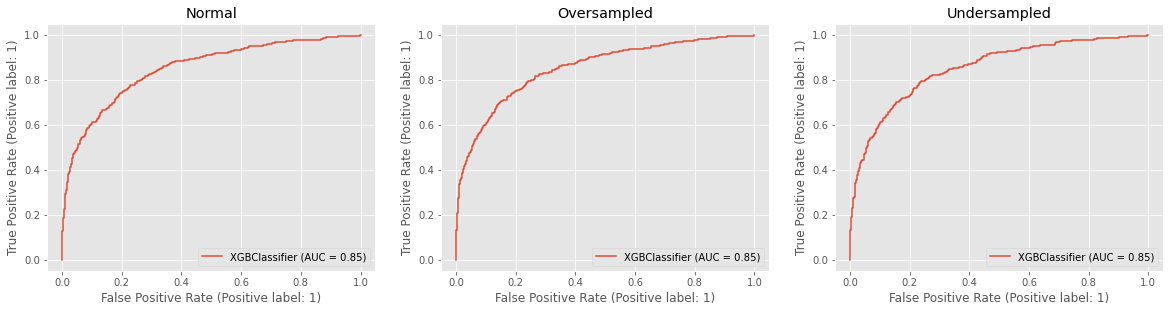

In [76]:
plot_auc_roc(xgbc, data_dict, data_test)

Optimize the model through RandomizedSearchCV or GridSearchCv for normal, oversampled and undersampled datasets (3 optimizations).

In [52]:
xgb_grid = {"colsample_bytree": np.linspace(0.1,0.9,5),
        "gamma": np.logspace(-4,2,10),
        "learning_rate": np.linspace(0.01,1,15),
        "max_depth": np.arange(1,11),
        "min_child_weight": np.logspace(-4,2,10),
        "n_estimators": [3000],
        "reg_alpha": np.linspace(0.1,0.9,5),
        "reg_lambda": np.linspace(0.1,0.9,5),
        "subsample": np.linspace(0.1,0.9,5)
}   

In [53]:
xgbc = XGBClassifier()

opt_xgbc = randomized_search(xgbc, data_train, xgb_grid, n_iter=100, n_jobs=-1)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[09:58:48] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [54]:
opt_xgbc.best_params_

{'subsample': 0.9,
 'reg_lambda': 0.7000000000000001,
 'reg_alpha': 0.9,
 'n_estimators': 3000,
 'min_child_weight': 0.0001,
 'max_depth': 6,
 'learning_rate': 0.8585714285714285,
 'gamma': 21.54434690031882,
 'colsample_bytree': 0.7000000000000001}

In [55]:
xgbc = XGBClassifier()

opt_xgbc_os = randomized_search(xgbc, data_oversampled, xgb_grid, n_iter=100, n_jobs=-1)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[11:52:40] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [56]:
opt_xgbc_os.best_params_

{'subsample': 0.7000000000000001,
 'reg_lambda': 0.30000000000000004,
 'reg_alpha': 0.5,
 'n_estimators': 3000,
 'min_child_weight': 0.01,
 'max_depth': 10,
 'learning_rate': 0.4342857142857143,
 'gamma': 0.21544346900318823,
 'colsample_bytree': 0.5}

In [57]:
xgbc = XGBClassifier()

opt_xgbc_us = randomized_search(xgbc, data_undersampled, xgb_grid, n_iter=100, n_jobs=-1)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[12:29:19] WARNING: ..\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [58]:
opt_xgbc_us.best_params_

{'subsample': 0.9,
 'reg_lambda': 0.7000000000000001,
 'reg_alpha': 0.9,
 'n_estimators': 3000,
 'min_child_weight': 0.0001,
 'max_depth': 6,
 'learning_rate': 0.8585714285714285,
 'gamma': 21.54434690031882,
 'colsample_bytree': 0.7000000000000001}

In [66]:
xgbc = XGBClassifier(subsample= 0.9, reg_lambda= 0.7,
                    reg_alpha= 0.9, n_estimators= 3000,
                    min_child_weight= 0.0001, max_depth= 6,
                    learning_rate= 0.8585714285714285,
                    gamma= 21.54434690031882,
                    colsample_bytree= 0.7,
                    eval_metric='auc')

xgbc_os = XGBClassifier(subsample= 0.7, reg_lambda= 0.3,
                        reg_alpha= 0.5, n_estimators= 3000,
                        min_child_weight= 0.01, max_depth= 10,
                        learning_rate= 0.4342857142857143,
                        gamma= 0.21544346900318823,
                        colsample_bytree= 0.5,
                        eval_metric='auc')

xgbc_us = XGBClassifier(subsample= 0.9, reg_lambda= 0.7,
                        reg_alpha= 0.9, n_estimators= 3000,
                        min_child_weight= 0.0001, max_depth= 6,
                        learning_rate= 0.8585714285,
                        gamma= 21.544346,
                        colsample_bytree= 0.7,
                        eval_metric='auc')

Fit the 3 models with the best params and evaluate on the test set (3 models).

#### Normal model

In [67]:
f1_evaluation(xgbc, data_dict, data_test)

F1 score on test set - Trained on Normal data: 0.5952
F1 score on test set - Trained on Oversampled data: 0.5894
F1 score on test set - Trained on Undersampled data: 0.5760


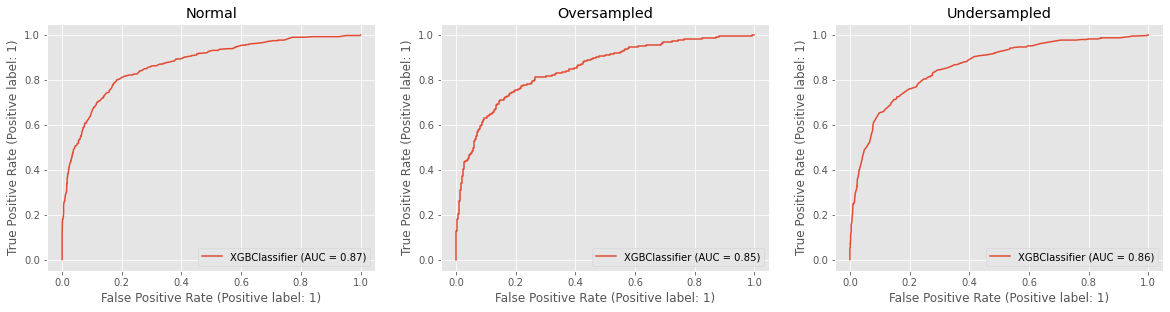

In [68]:
plot_auc_roc(xgbc, data_dict, data_test)

#### OS model

In [69]:
f1_evaluation(xgbc_os, data_dict, data_test)

F1 score on test set - Trained on Normal data: 0.5756
F1 score on test set - Trained on Oversampled data: 0.5906
F1 score on test set - Trained on Undersampled data: 0.5666


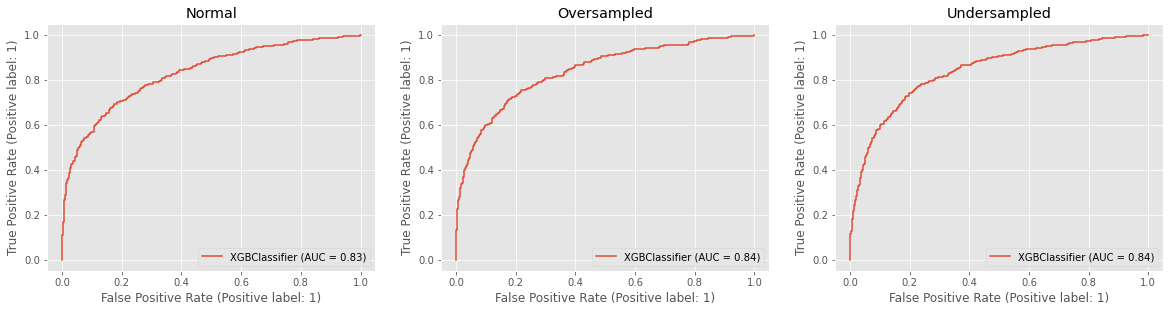

In [70]:
plot_auc_roc(xgbc_os, data_dict, data_test)

#### US model

In [71]:
f1_evaluation(xgbc_us, data_dict, data_test)

F1 score on test set - Trained on Normal data: 0.5952
F1 score on test set - Trained on Oversampled data: 0.5894
F1 score on test set - Trained on Undersampled data: 0.5760


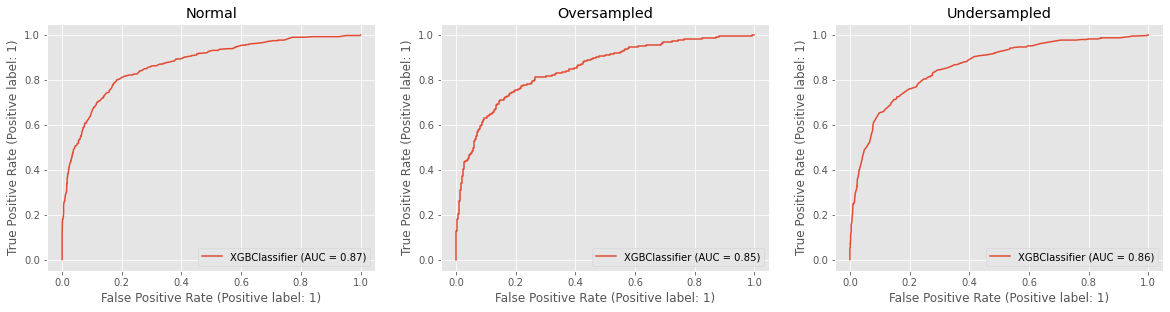

In [72]:
plot_auc_roc(xgbc_us, data_dict, data_test)

In [121]:
xgb_results = {"No optimization": {
                    "CV F1": {
                      "Normal": 0.57, "Oversampled": 0.9076, "Undersampled": 0.7605
                    },
                    "F1 on test": {
                      "Normal": 0.5888, "Oversampled": 0.6066, "Undersampled": 0.5725
                    },
                    "AUC on test": {
                      "Normal": 0.8500, "Oversampled": 0.8500, "Undersampled": 0.8500
                    }
               },
               "Optimization in normal": {
                    "F1 on test": {
                      "Normal": 0.5952, "Oversampled": 0.5894, "Undersampled": 0.5760
                    },
                    "AUC on test": {
                      "Normal": 0.8700, "Oversampled": 0.8500, "Undersampled": 0.8600
                    }
               },
               "Optimization in oversampled": {
                    "F1 on test": {
                      "Normal": 0.5756, "Oversampled": 0.5906, "Undersampled": 0.5666
                    },
                    "AUC on test": {
                      "Normal": 0.83, "Oversampled": 0.84, "Undersampled": 0.84
                    }
               },
               "Optimization in undersampled": {
                    "F1 on test": {
                      "Normal": 0.5952, "Oversampled": 0.5894, "Undersampled": 0.5760
                    },
                    "AUC on test": {
                      "Normal": 0.87, "Oversampled": 0.85, "Undersampled": 0.86
                    }
                }
              }

In [113]:
X = data_oh.drop("Exited", axis = 1)
y = data_oh["Exited"]

In [115]:
f1_macro_cv_score(lgbmc, X, y)

0.6114918479885796

### LGBM Classifier

In [81]:
lgbmc = LGBMClassifier(is_unbalance=True)

Compute cv_f1_evaluation() with normal, oversampled and undersampled datasets.

In [82]:
cv_f1_evaluation(lgbmc, data_dict)

CV F1 score for Normal data: 0.6110
CV F1 score for Oversampled data: 0.8569
CV F1 score for Undersampled data: 0.7600


**Notice:** CV is **very optimist in the Oversampled data** because the out-of-fold samples are very likely to be also in the fold.

Compute f1_evaluation() training with normal, oversampled and undersampled datasets and testing on test set.

In [85]:
f1_evaluation(lgbmc, data_dict, data_test)

F1 score on test set - Trained on Normal data: 0.6026
F1 score on test set - Trained on Oversampled data: 0.6172
F1 score on test set - Trained on Undersampled data: 0.5811


Compute AUC ROC and plot ROC training with normal, oversampled and undersampled datasets and testing on test set.

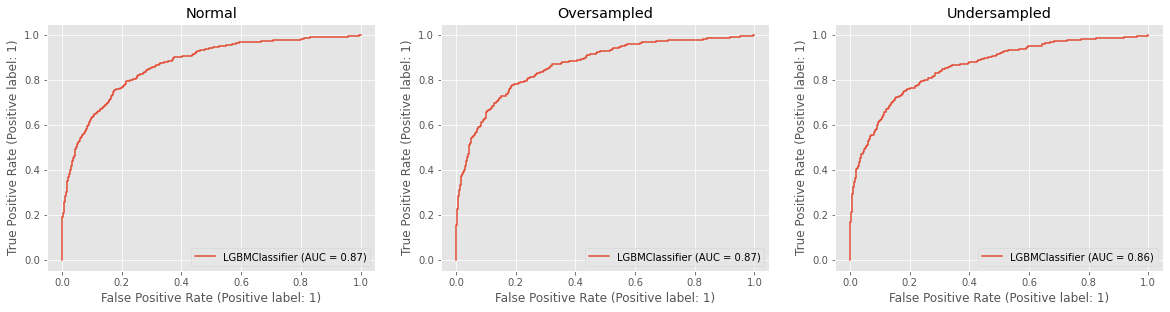

In [86]:
plot_auc_roc(lgbmc, data_dict, data_test)

Optimize the model through RandomizedSearchCV or GridSearchCv for normal, oversampled and undersampled datasets (3 optimizations).

In [32]:
lgbm_grid = {"objective": ["binary"],
             "num_leaves": [x**2 for x in np.arange(1,11)],
             "learning_rate": np.linspace(0.001,0.03,15),
             "n_estimators": [3000],
             "max_bin": np.linspace(5,255,15).astype(int),
             "subsample": np.linspace(0.1,1,5),
             "subsample_freq": np.linspace(1,11).astype(int),
             "colsample_bytree": np.linspace(0.1,1,5),
             "min_child_samples": [x**2 for x in np.arange(1,11)],
             "min_child_weight": np.logspace(-4,0,10)
}   
import warnings
warnings.filterwarnings('ignore')

In [34]:
lgbmc = LGBMClassifier(is_unbalance=True, verbose=-1)

In [317]:
opt_lgbmc = randomized_search(lgbmc, data_train, lgbm_grid, n_iter=100, cv=5, n_jobs=1)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [35]:
opt_lgbmc_os = randomized_search(lgbmc, data_oversampled, lgbm_grid, n_iter=100, cv=5, n_jobs=1)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [37]:
opt_lgbmc_us = randomized_search(lgbmc, data_undersampled, lgbm_grid, n_iter=100, cv=5, n_jobs=1)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


In [318]:
opt_lgbmc.best_params_

{'subsample_freq': 10,
 'subsample': 0.55,
 'objective': 'binary',
 'num_leaves': 36,
 'n_estimators': 3000,
 'min_child_weight': 0.0001,
 'min_child_samples': 100,
 'max_bin': 112,
 'learning_rate': 0.001,
 'colsample_bytree': 0.775}

In [36]:
opt_lgbmc_os.best_params_

{'subsample_freq': 2,
 'subsample': 1.0,
 'objective': 'binary',
 'num_leaves': 81,
 'n_estimators': 3000,
 'min_child_weight': 0.016681005372000592,
 'min_child_samples': 9,
 'max_bin': 237,
 'learning_rate': 0.013428571428571429,
 'colsample_bytree': 1.0}

In [38]:
opt_lgbmc_us.best_params_

{'subsample_freq': 4,
 'subsample': 1.0,
 'objective': 'binary',
 'num_leaves': 4,
 'n_estimators': 3000,
 'min_child_weight': 0.3593813663804626,
 'min_child_samples': 25,
 'max_bin': 130,
 'learning_rate': 0.011357142857142857,
 'colsample_bytree': 0.55}

Fit the 3 models with the best params and evaluate on the test set (3 models).

#### Normal

In [34]:
opt_lgbmc_best_params_ = {'subsample_freq': 10,
                          'subsample': 0.55,
                           'objective': 'binary',
                           'num_leaves': 36,
                           'n_estimators': 3000,
                           'min_child_weight': 0.0001,
                           'min_child_samples': 100,
                           'max_bin': 112,
                           'learning_rate': 0.001,
                           'colsample_bytree': 0.775}

lgbmc = LGBMClassifier(is_unbalance=True, **opt_lgbmc_best_params_)

In [35]:
f1_evaluation(lgbmc, data_dict, data_test)

F1 score on test set - Trained on Normal data: 0.6375
F1 score on test set - Trained on Oversampled data: 0.6289
F1 score on test set - Trained on Undersampled data: 0.5934


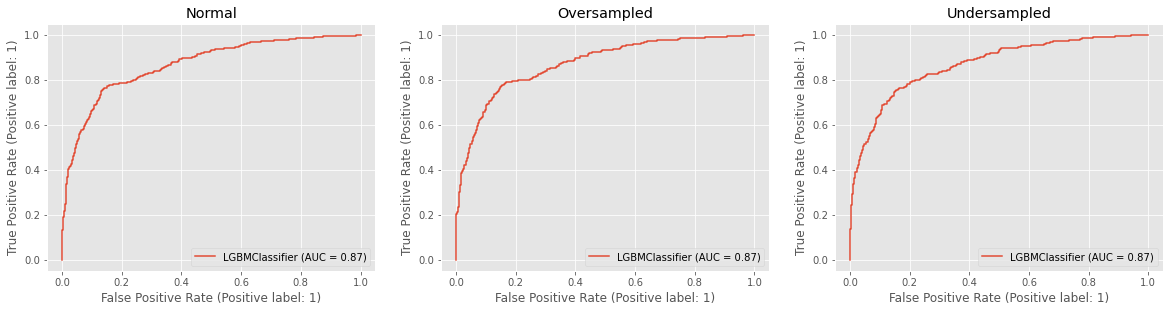

In [36]:
plot_auc_roc(lgbmc, data_dict, data_test)

#### Oversampled

In [37]:
opt_lgbmc_os_best_params_ = {'subsample_freq': 2,
                            'subsample': 1.0,
                            'objective': 'binary',
                            'num_leaves': 81,
                            'n_estimators': 3000,
                            'min_child_weight': 0.016681005372000592,
                            'min_child_samples': 9,
                            'max_bin': 237,
                            'learning_rate': 0.013428571428571429,
                            'colsample_bytree': 1.0}

lgbmc_os = LGBMClassifier(is_unbalance=True, **opt_lgbmc_os_best_params_)

In [38]:
f1_evaluation(lgbmc_os, data_dict, data_test)

F1 score on test set - Trained on Normal data: 0.5887
F1 score on test set - Trained on Oversampled data: 0.5973
F1 score on test set - Trained on Undersampled data: 0.5629


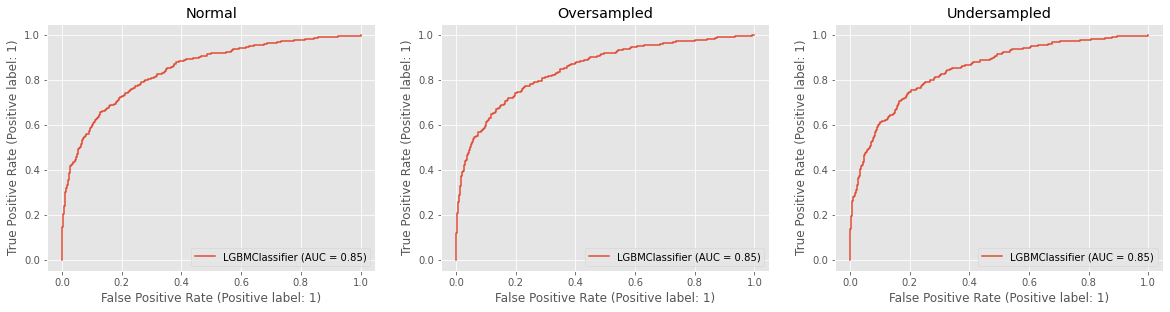

In [39]:
plot_auc_roc(lgbmc_os, data_dict, data_test)

#### Undersampled

In [40]:
opt_lgbmc_us_best_params_ = {'subsample_freq': 4,
                            'subsample': 1.0,
                            'objective': 'binary',
                            'num_leaves': 4,
                            'n_estimators': 3000,
                            'min_child_weight': 0.3593813663804626,
                            'min_child_samples': 25,
                            'max_bin': 130,
                            'learning_rate': 0.011357142857142857,
                            'colsample_bytree': 0.55}


lgbmc_us = LGBMClassifier(is_unbalance=True, **opt_lgbmc_us_best_params_)

In [42]:
f1_evaluation(lgbmc_us, data_dict, data_test)

F1 score on test set - Trained on Normal data: 0.6245
F1 score on test set - Trained on Oversampled data: 0.6220
F1 score on test set - Trained on Undersampled data: 0.6161


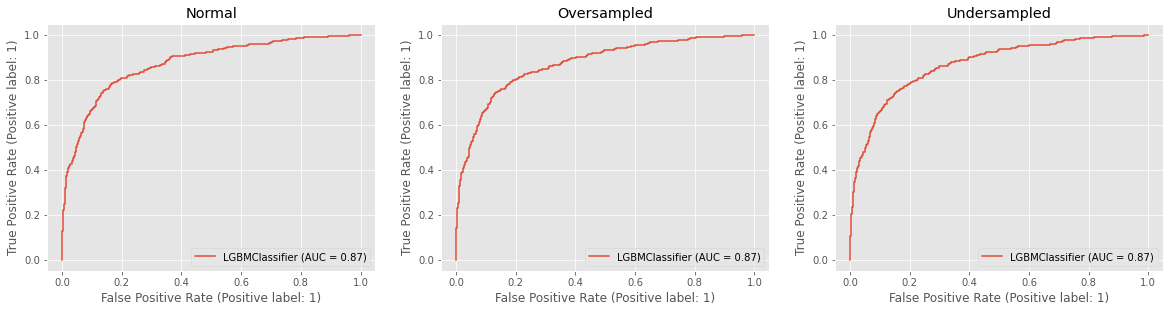

In [41]:
plot_auc_roc(lgbmc_us, data_dict, data_test)

In [116]:
lgbm_results = {"No optimization": {
                    "CV F1": {
                      "Normal": 0.6110, "Oversampled": 0.8569, "Undersampled": 0.7600
                    },
                    "F1 on test": {
                      "Normal": 0.6026, "Oversampled": 0.6172, "Undersampled": 0.5811
                    },
                    "AUC on test": {
                      "Normal": 0.87, "Oversampled": 0.87, "Undersampled": 0.86
                    }
               },
               "Optimization in normal": {
                    "F1 on test": {
                      "Normal": 0.6375, "Oversampled": 0.6289, "Undersampled": 0.5934
                    },
                    "AUC on test": {
                      "Normal": 0.87, "Oversampled": 0.87, "Undersampled": 0.87
                    }
               },
               "Optimization in oversampled": {
                    "F1 on test": {
                      "Normal": 0.5887, "Oversampled": 0.5973, "Undersampled": 0.5629
                    },
                    "AUC on test": {
                      "Normal": 0.85, "Oversampled": 0.85, "Undersampled": 0.85
                    }
               },
               "Optimization in undersampled": {
                    "F1 on test": {
                      "Normal": 0.6245, "Oversampled": 0.6220, "Undersampled": 0.6161
                    },
                    "AUC on test": {
                      "Normal": 0.87, "Oversampled": 0.87, "Undersampled": 0.87
                    }
                }
              }

### Random Forest Classifier

In [69]:
rfc = RandomForestClassifier(random_state=42, class_weight="balanced")

Compute cv_f1_evaluation() with normal, oversampled and undersampled datasets.

In [70]:
cv_f1_evaluation(rfc, data_dict)

CV F1 score for Normal data: 0.5638
CV F1 score for Oversampled data: 0.9571
CV F1 score for Undersampled data: 0.7573


**Notice:** CV is **very optimist in the Oversampled data** because the out-of-fold samples are very likely to be also in the fold.

Compute f1_evaluation() training with normal, oversampled and undersampled datasets and testing on test set.

In [144]:
f1_evaluation(rfc, data_dict, data_test)

F1 score on test set - Trained on Normal data: 0.5723
F1 score on test set - Trained on Oversampled data: 0.6098
F1 score on test set - Trained on Undersampled data: 0.5786


Compute AUC ROC and plot ROC training with normal, oversampled and undersampled datasets and testing on test set.

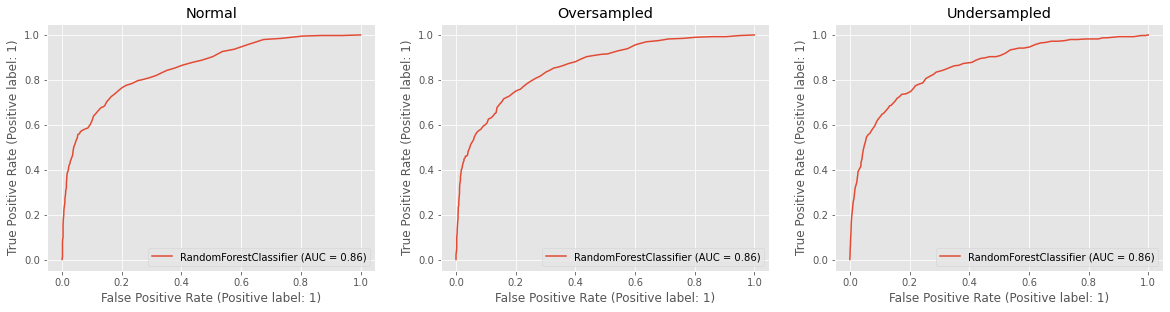

In [154]:
plot_auc_roc(rfc, data_dict, data_test)

Optimize the model through RandomizedSearchCV or GridSearchCv for normal, oversampled and undersampled datasets (3 optimizations).

In [164]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(3, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
rf_grid = {'n_estimators': n_estimators,
           'max_features': max_features,
           'max_depth': max_depth,
           'min_samples_split': min_samples_split,
           'min_samples_leaf': min_samples_leaf,
            'bootstrap': bootstrap}


In [171]:
rfc = RandomForestClassifier(random_state=42, class_weight="balanced")

opt_rfc = randomized_search(rfc, data_train, rf_grid, n_iter=20, n_jobs=-1)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [178]:
rfc = RandomForestClassifier(random_state=42, class_weight="balanced")

opt_rfc_os = randomized_search(rfc, data_oversampled, rf_grid, n_iter=20, n_jobs=-1)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [180]:
rfc = RandomForestClassifier(random_state=42, class_weight="balanced")

opt_rfc_us = randomized_search(rfc, data_oversampled, rf_grid, n_iter=20, n_jobs=-1)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


In [176]:
print(opt_rfc.best_params_)

{'n_estimators': 1600, 'min_samples_split': 2, 'min_samples_leaf': 4, 'max_features': 'auto', 'max_depth': None, 'bootstrap': True}


In [179]:
print(opt_rfc_os.best_params_)


{'n_estimators': 2000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 45, 'bootstrap': False}


In [181]:
print(opt_rfc_us.best_params_)

{'n_estimators': 2000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 45, 'bootstrap': False}


In [32]:
rfc = RandomForestClassifier(random_state=42, class_weight="balanced",
                            n_estimators=1600, min_samples_split=2,
                            min_samples_leaf=4, max_features="auto",
                            max_depth=None, bootstrap=True)

rfc_os = RandomForestClassifier(random_state=42, class_weight="balanced",
                            n_estimators=2000, min_samples_split=2,
                            min_samples_leaf=2, max_features="auto",
                            max_depth=45, bootstrap=False)

rfc_us = RandomForestClassifier(random_state=42, class_weight="balanced",
                            n_estimators=2000, min_samples_split=2,
                            min_samples_leaf=2, max_features="auto",
                            max_depth=45, bootstrap=False)

Fit the 3 models with the best params and evaluate on the test set (3 models).

#### Normal model

In [33]:
f1_evaluation(rfc, data_dict, data_test)

F1 score on test set - Trained on Normal data: 0.6309
F1 score on test set - Trained on Oversampled data: 0.6345
F1 score on test set - Trained on Undersampled data: 0.5909


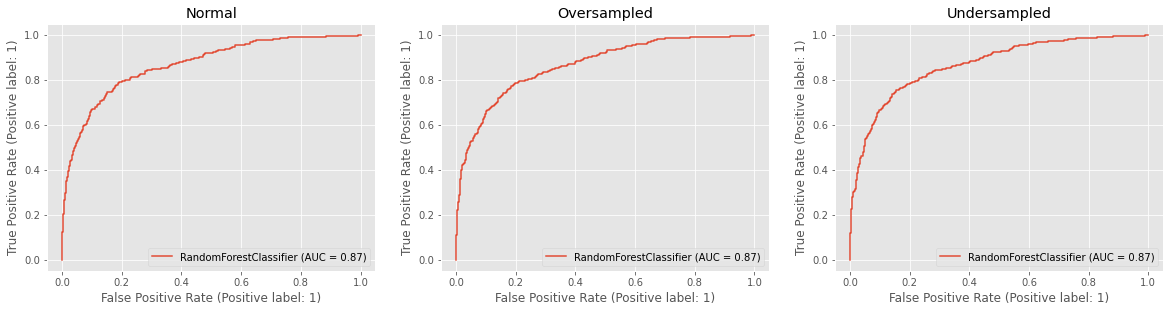

In [175]:
plot_auc_roc(rfc, data_dict, data_test)

#### OS model

In [183]:
f1_evaluation(rfc_os, data_dict, data_test)

F1 score on test set - Trained on Normal data: 0.6044
F1 score on test set - Trained on Oversampled data: 0.6068
F1 score on test set - Trained on Undersampled data: 0.5907


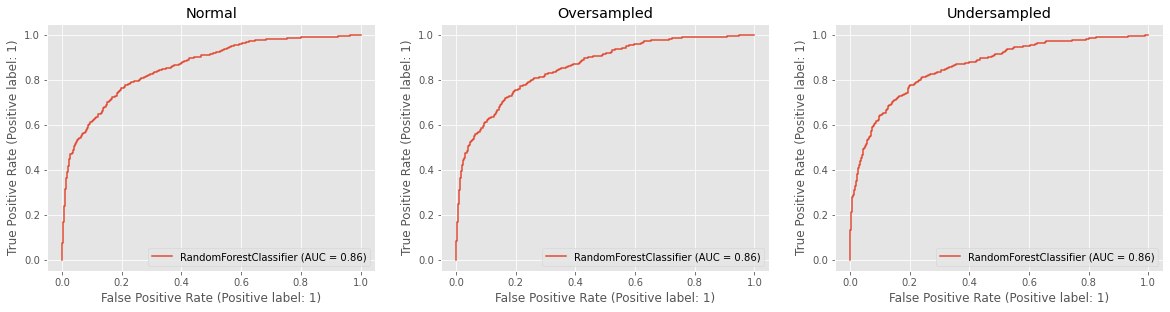

In [184]:
plot_auc_roc(rfc_os, data_dict, data_test)

#### US model

In [185]:
f1_evaluation(rfc_us, data_dict, data_test)

F1 score on test set - Trained on Normal data: 0.6044
F1 score on test set - Trained on Oversampled data: 0.6068
F1 score on test set - Trained on Undersampled data: 0.5907


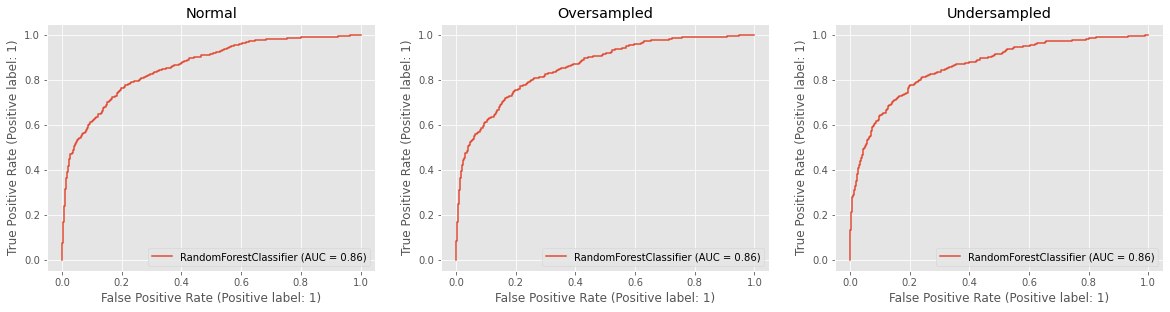

In [186]:
plot_auc_roc(rfc_us, data_dict, data_test)

In [118]:
rf_results =  {"No optimization": {
                    "CV F1": {
                      "Normal": 0.5638, "Oversampled": 0.9571, "Undersampled": 0.7573
                    },
                    "F1 on test": {
                      "Normal": 0.5723, "Oversampled": 0.6098, "Undersampled": 0.5786
                    },
                    "AUC on test": {
                      "Normal": 0.86, "Oversampled": 0.86, "Undersampled": 0.86
                    }
               },
               "Optimization in normal": {
                    "F1 on test": {
                      "Normal": 0.6309, "Oversampled": 0.6345, "Undersampled": 0.5909
                    },
                    "AUC on test": {
                      "Normal": 0.87, "Oversampled": 0.87, "Undersampled": 0.87
                    }
               },
               "Optimization in oversampled": {
                    "F1 on test": {
                      "Normal": 0.6044, "Oversampled": 0.6068, "Undersampled": 0.5907
                    },
                    "AUC on test": {
                      "Normal": 0.86, "Oversampled": 0.86, "Undersampled": 0.86
                    }
               },
               "Optimization in undersampled": {
                    "F1 on test": {
                      "Normal": 0.6044, "Oversampled": 0.6068, "Undersampled": 0.5907
                    },
                    "AUC on test": {
                      "Normal": 0.86, "Oversampled": 0.86, "Undersampled": 0.86
                    }
                }
              }

### Model evaluation

How to make the comparison?

1. Make one comparison at no-optimization level (CV F1 , F1 on test, AUC on test, for the 3 models in a bar chart. One graph per metric)
2. For each type of model yield a bar chart comparing performance in both F1 and AUC scores on the test set, with the model trained on the data it was optimized on.

In [122]:
results = {"XGB": xgb_results,
           "LGBM": lgbm_results,
           "Random Forest": rf_results}

Create a dict with 3 rows (1 for each type of model). And as columns all the results that we obtained from them

In [182]:
models_r = []
for model_name, model_result_dict in results.items():
    model_results_arranged = {}
    model_results_arranged["model_type"] = model_name
    for optimization_name, optimization_dict in model_result_dict.items():
        for metric_name, metric_result_dict in optimization_dict.items():
            opt_name = optimization_name.replace("imization", ".")
            opt_name= opt_name.replace(" in normal", "_Normal",)
            opt_name= opt_name.replace(" in oversampled", "_OS",)
            opt_name= opt_name.replace(" in undersampled", "_US",)

            met_name = metric_name.replace(" on test", "")

            col_name = opt_name + "-" + met_name

            model_results_arranged[col_name + "-TON-Normal"] = metric_result_dict["Normal"]
            model_results_arranged[col_name + "-TON-OS"] = metric_result_dict["Oversampled"]
            model_results_arranged[col_name + "-TON-US"] = metric_result_dict["Undersampled"]
    models_r.append(model_results_arranged)

In [201]:
column_names = [col for col, _ in models_r[0].items()]
column_names[:10]

['model_type',
 'No opt.-CV F1-TON-Normal',
 'No opt.-CV F1-TON-OS',
 'No opt.-CV F1-TON-US',
 'No opt.-F1-TON-Normal',
 'No opt.-F1-TON-OS',
 'No opt.-F1-TON-US',
 'No opt.-AUC-TON-Normal',
 'No opt.-AUC-TON-OS',
 'No opt.-AUC-TON-US']

In [193]:
results_df = pd.DataFrame(columns=column_names)
for model_dict in models_r:
    results_df = results_df.append(model_dict, ignore_index=True)
results_df.set_index("model_type", inplace=True)
results_df.head()

,No opt.-CV F1-TON-Normal,No opt.-CV F1-TON-OS,No opt.-CV F1-TON-US,No opt.-F1-TON-Normal,No opt.-F1-TON-OS,No opt.-F1-TON-US,No opt.-AUC-TON-Normal,No opt.-AUC-TON-OS,No opt.-AUC-TON-US,Opt._Normal-F1-TON-Normal,...,Opt._OS-F1-TON-US,Opt._OS-AUC-TON-Normal,Opt._OS-AUC-TON-OS,Opt._OS-AUC-TON-US,Opt._US-F1-TON-Normal,Opt._US-F1-TON-OS,Opt._US-F1-TON-US,Opt._US-AUC-TON-Normal,Opt._US-AUC-TON-OS,Opt._US-AUC-TON-US
model_type,,,,,,,,,,,,,,,,,,,,,
XGB,0.57,0.9076,0.7605,0.5888,0.6066,0.5725,0.85,0.85,0.85,0.5952,...,0.5666,0.83,0.84,0.84,0.5952,0.5894,0.576,0.87,0.85,0.86
LGBM,0.611,0.8569,0.76,0.6026,0.6172,0.5811,0.87,0.87,0.86,0.6375,...,0.5629,0.85,0.85,0.85,0.6245,0.622,0.6161,0.87,0.87,0.87
Random Forest,0.5638,0.9571,0.7573,0.5723,0.6098,0.5786,0.86,0.86,0.86,0.6309,...,0.5907,0.86,0.86,0.86,0.6044,0.6068,0.5907,0.86,0.86,0.86


In [317]:
no_opt_cols_cvf1 = [col for col in column_names if col.startswith("No opt.-CV F1")]
no_opt_cols_f1 = [col for col in column_names if col.startswith("No opt.-F1-TON")]
no_opt_cols_auc = [col for col in column_names if col.startswith("No opt.-AUC-TON")]

In [318]:
results_df[no_opt_cols_cvf1]

,No opt.-CV F1-TON-Normal,No opt.-CV F1-TON-OS,No opt.-CV F1-TON-US
model_type,,,
XGB,0.57,0.9076,0.7605
LGBM,0.611,0.8569,0.76
Random Forest,0.5638,0.9571,0.7573


1. Make one comparison at no-optimization level (CV F1 , F1 on test, AUC on test, for the 3 models in a bar chart. One graph per metric)

In [319]:
results_df[no_opt_cols_cvf1].max().max()

0.9571

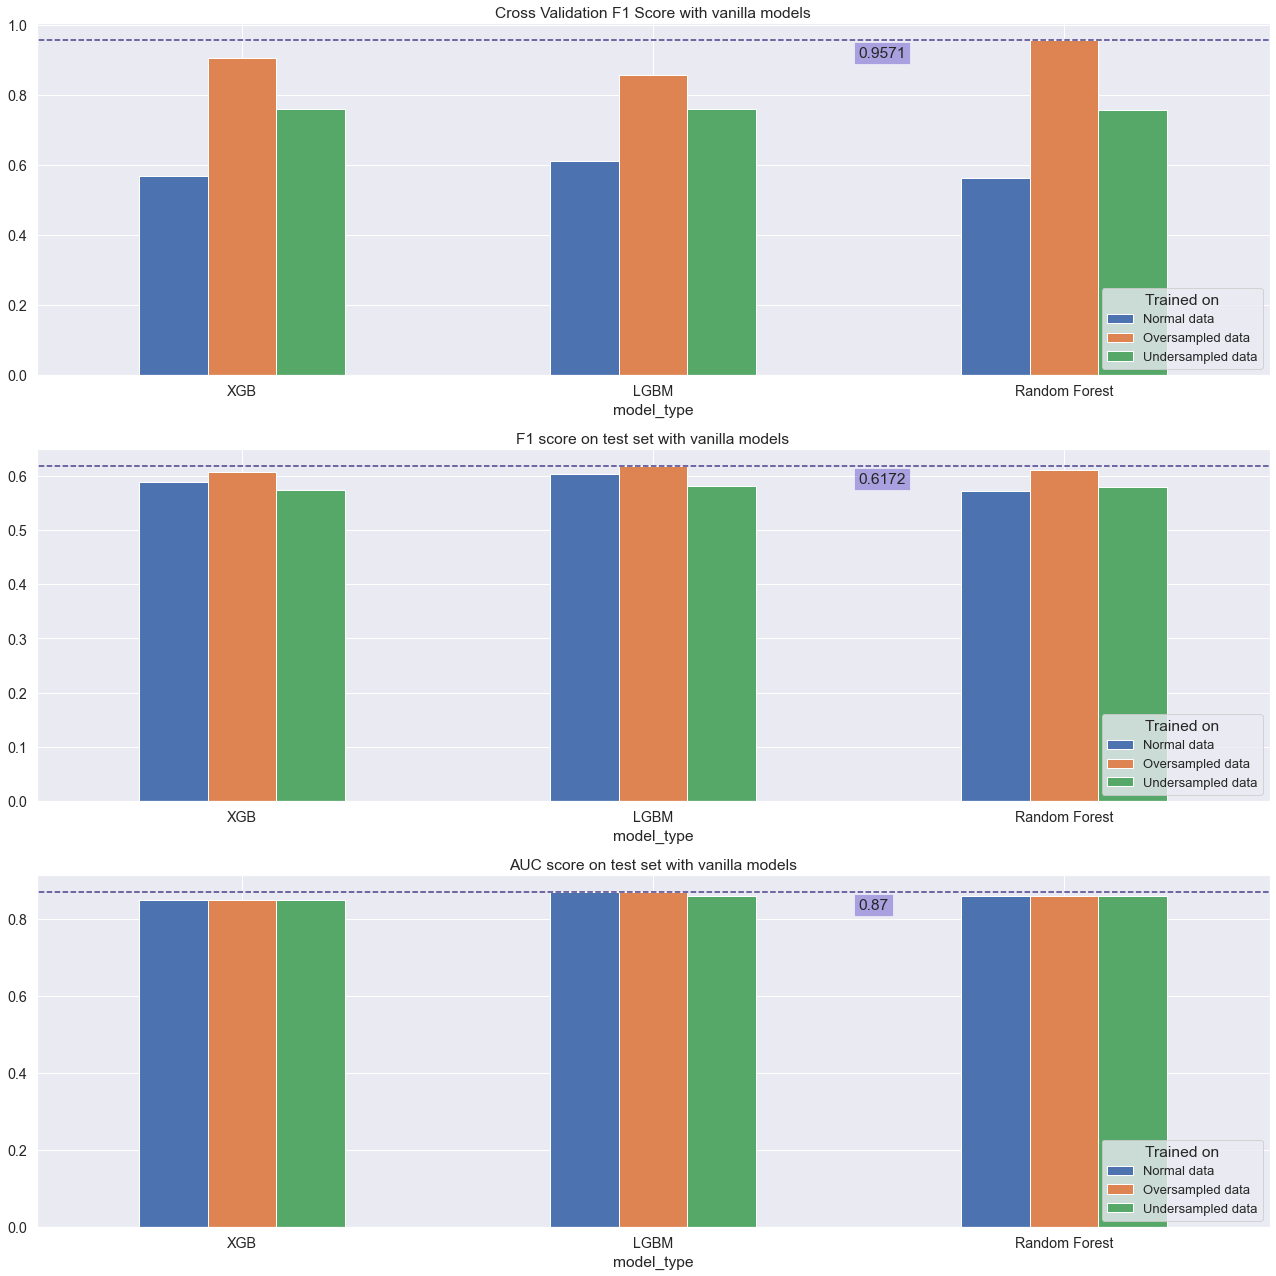

In [320]:
fig = plt.figure(figsize=(18,18))
titles = ["Cross Validation F1 Score with vanilla models",
          "F1 score on test set with vanilla models",
          "AUC score on test set with vanilla models"]

for i, data_r in enumerate([no_opt_cols_cvf1, no_opt_cols_f1, no_opt_cols_auc]):
    sub = fig.add_subplot(3, 1, i+1)
    results_df[data_r].plot(kind="bar", ax=sub)
    sub.set(title=titles[i])
    sub.legend(["Normal data",
            "Oversampled data",
            "Undersampled data"],
            title="Trained on", loc=4, fontsize='small', fancybox=True)
    max_val = results_df[data_r].max().max()
    plt.hlines(y = max_val, xmin=-1, xmax=5, linestyles='--', color="darkslateblue")
    plt.text(x=1.5, y=max_val*0.95, s=str(max_val), bbox=dict(facecolor='slateblue', alpha=0.5))
    
    plt.xticks(rotation = 0);
plt.tight_layout(h_pad=1.0)

2. For each type of model yield a bar chart comparing performance in both F1 and AUC scores on the test set, with the model trained on the data it was optimized on.

In [262]:
results_df_ = results_df.reset_index()
results_df_.head()

,model_type,No opt.-CV F1-TON-Normal,No opt.-CV F1-TON-OS,No opt.-CV F1-TON-US,No opt.-F1-TON-Normal,No opt.-F1-TON-OS,No opt.-F1-TON-US,No opt.-AUC-TON-Normal,No opt.-AUC-TON-OS,No opt.-AUC-TON-US,...,Opt._OS-F1-TON-US,Opt._OS-AUC-TON-Normal,Opt._OS-AUC-TON-OS,Opt._OS-AUC-TON-US,Opt._US-F1-TON-Normal,Opt._US-F1-TON-OS,Opt._US-F1-TON-US,Opt._US-AUC-TON-Normal,Opt._US-AUC-TON-OS,Opt._US-AUC-TON-US
0,XGB,0.57,0.9076,0.7605,0.5888,0.6066,0.5725,0.85,0.85,0.85,...,0.5666,0.83,0.84,0.84,0.5952,0.5894,0.576,0.87,0.85,0.86
1,LGBM,0.611,0.8569,0.76,0.6026,0.6172,0.5811,0.87,0.87,0.86,...,0.5629,0.85,0.85,0.85,0.6245,0.622,0.6161,0.87,0.87,0.87
2,Random Forest,0.5638,0.9571,0.7573,0.5723,0.6098,0.5786,0.86,0.86,0.86,...,0.5907,0.86,0.86,0.86,0.6044,0.6068,0.5907,0.86,0.86,0.86


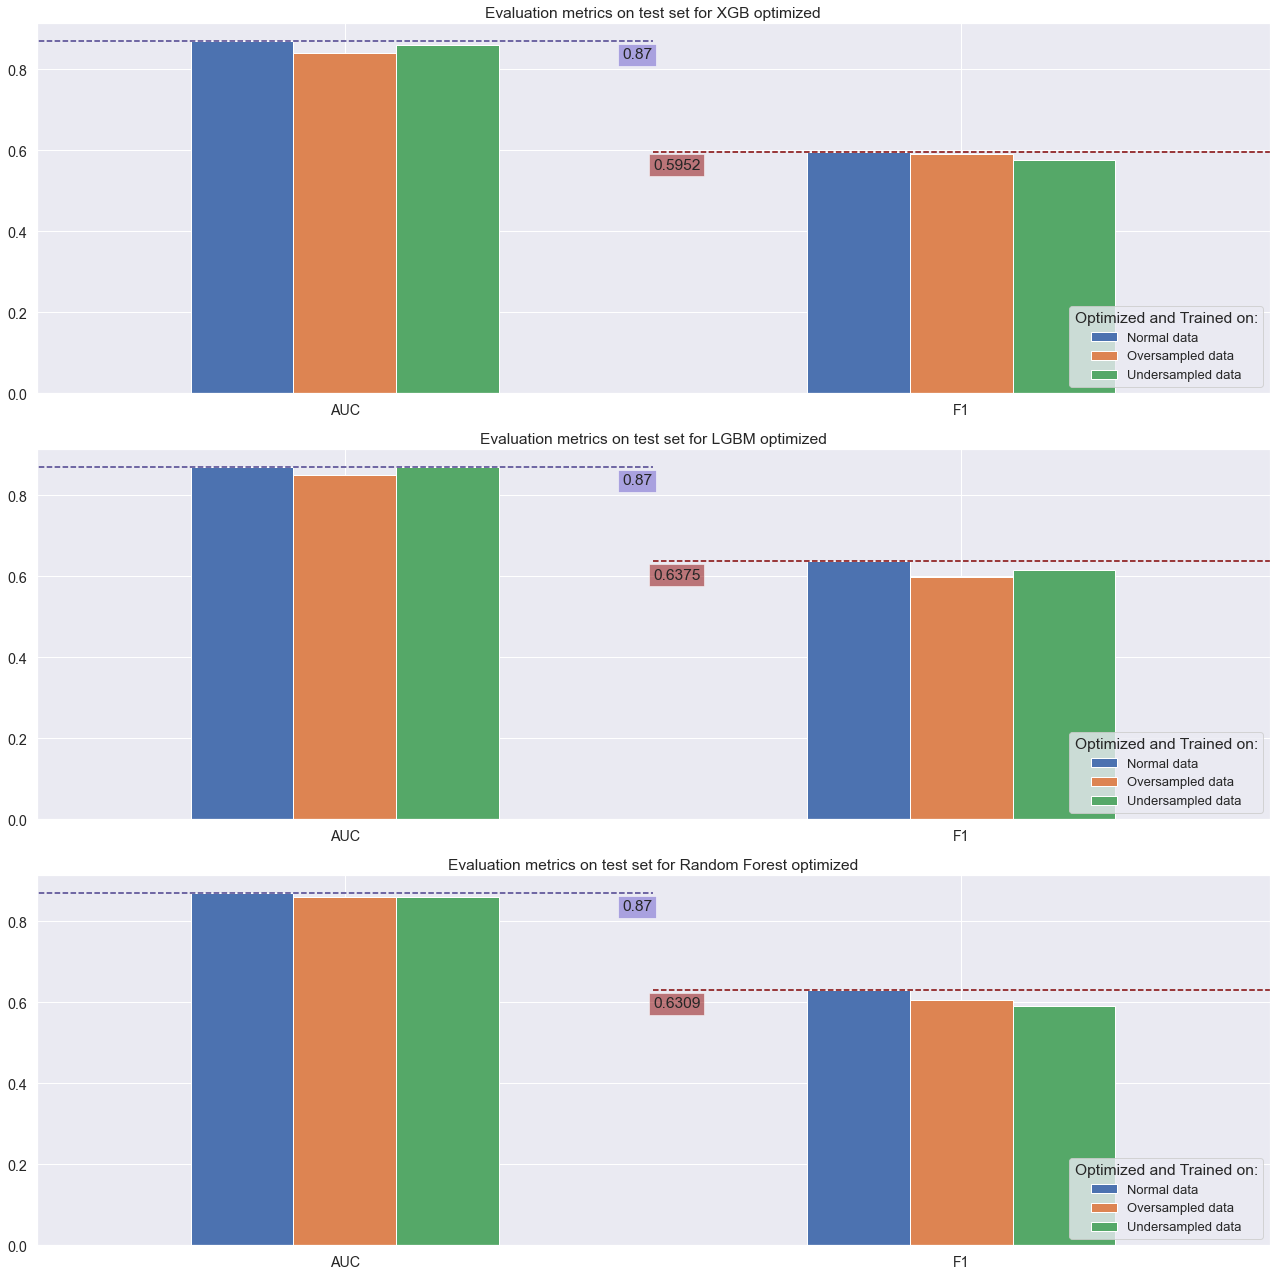

In [316]:
cols_picked = []
for col in results_df_.columns:
    for keyword in ["Normal", "OS", "US"]:
        if (col.count(keyword) > 1):
            cols_picked.append(col)

fig = plt.figure(figsize=(18,18))
titles = ["Evaluation metrics on test set for XGB optimized",
          "Evaluation metrics on test set for LGBM optimized",
          "Evaluation metrics on test set for Random Forest optimized"]

for i, model_name in enumerate(results_df_["model_type"].unique()):
    results_model = results_df_[results_df_["model_type"] == model_name]
    AUC_list = results_model[[col for col in cols_picked if 'AUC' in col]].values
    F1_list = results_model[[col for col in cols_picked if 'F1' in col]].values
    
    temp_df = pd.DataFrame({"Optimized on": ["Normal", "OS", "US"],"AUC": AUC_list[0], "F1": F1_list[0]})
    temp_df.set_index("Optimized on", inplace=True)

    sub = fig.add_subplot(3, 1, i+1)
    temp_df.T.plot(kind="bar", ax=sub)
    sub.set(title=titles[i])
    sub.legend(["Normal data",
            "Oversampled data",
            "Undersampled data"],
            title="Optimized and Trained on:", loc=4, fontsize='small', fancybox=True)

    max_auc = temp_df["AUC"].max()
    plt.hlines(y = max_auc, xmin=-1, xmax=0.5, linestyles='--', color="darkslateblue")
    plt.text(x=0.5*0.9, y=max_auc*0.95, s=str(max_auc), bbox=dict(facecolor='slateblue', alpha=0.5))

    max_f1 = temp_df["F1"].max()
    plt.hlines(y = max_f1, xmin=0.5, xmax=5, linestyles='--', color="maroon")
    plt.text(x=0.5, y=max_f1*0.93, s=str(max_f1), bbox=dict(facecolor='darkred', alpha=0.5))

    plt.xticks(rotation = 0);
plt.tight_layout(h_pad=1.0)

By analyzing the previous plots, one could claim that the best model is the LGBM classifier optimized on the normal data. 

So let's check its performance on the test set with other metrics, such as a confusion matrix.

In [321]:
X_train = data_train.drop("Exited", axis = 1)
y_train = data_train["Exited"]

X_test = data_test.drop("Exited", axis = 1)
y_test = data_test["Exited"]

In [323]:
opt_lgbmc_best_params_ = {'subsample_freq': 10,
                          'subsample': 0.55,
                           'objective': 'binary',
                           'num_leaves': 36,
                           'n_estimators': 3000,
                           'min_child_weight': 0.0001,
                           'min_child_samples': 100,
                           'max_bin': 112,
                           'learning_rate': 0.001,
                           'colsample_bytree': 0.775}

lgbmc = LGBMClassifier(is_unbalance=True, **opt_lgbmc_best_params_)
lgbmc.fit(X_train, y_train)

y_pred = lgbmc.predict(X_test)

In [327]:
y_pred_train = lgbmc.predict(X_train)

In [85]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.84      0.89      1607
           1       0.54      0.78      0.64       393

    accuracy                           0.83      2000
   macro avg       0.74      0.81      0.76      2000
weighted avg       0.86      0.83      0.84      2000



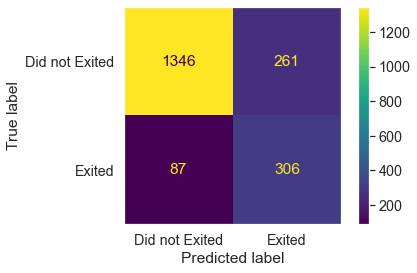

In [330]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Did not Exited", "Exited"])
disp.plot()
plt.grid(False)
plt.show()

From the confusion matrix above, we can see that the best model predicted that 261 customers would churn, although at the end they did not. 

While for 87 customers that did churn our model predicted that they would not.

To better visualize the performance of our model let's normalize the confusion matrix.

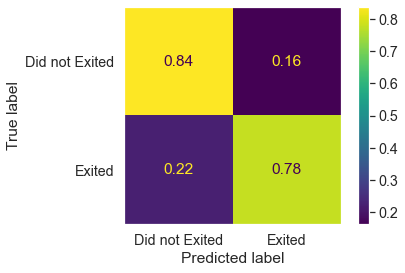

In [326]:
cm = confusion_matrix(y_test, y_pred, normalize='true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["Did not Exited", "Exited"])
disp.plot()
plt.grid(False)
plt.show()



From the normalized confusion matrix it is possible to see that 78% (306) of the customers that churned were correctly predicted as churners. Although the model makes some errors such as predicting as churners customers that did not churn (16% of not churners), it is a must to keep in mind that in the business context we are studying in this project it is more important to identify customers that will actually churn (higher true positive rate/recall) than to identify those who will not. Considering this, there is a tolerance for our model to predict as churners customers that will not churn as long as we obtain a higher recall. 

The bank is expected to take action to prevent the potential churners to leave. If the bank decides to use this model, the incentives or gifts offered, would also go to the customers that are not potential churners. This is not that bad, as the bank is preventing these customers to become potential churners in the future.

## 7. Feature importance

### Random Forest

In [96]:
rfc = RandomForestClassifier(random_state=42, class_weight="balanced",
                            n_estimators=1600, min_samples_split=2,
                            min_samples_leaf=4, max_features="auto",
                            max_depth=None, bootstrap=True)
rfc.fit(X_train, y_train)                        

RandomForestClassifier(class_weight='balanced', min_samples_leaf=4,
                       n_estimators=1600, random_state=42)

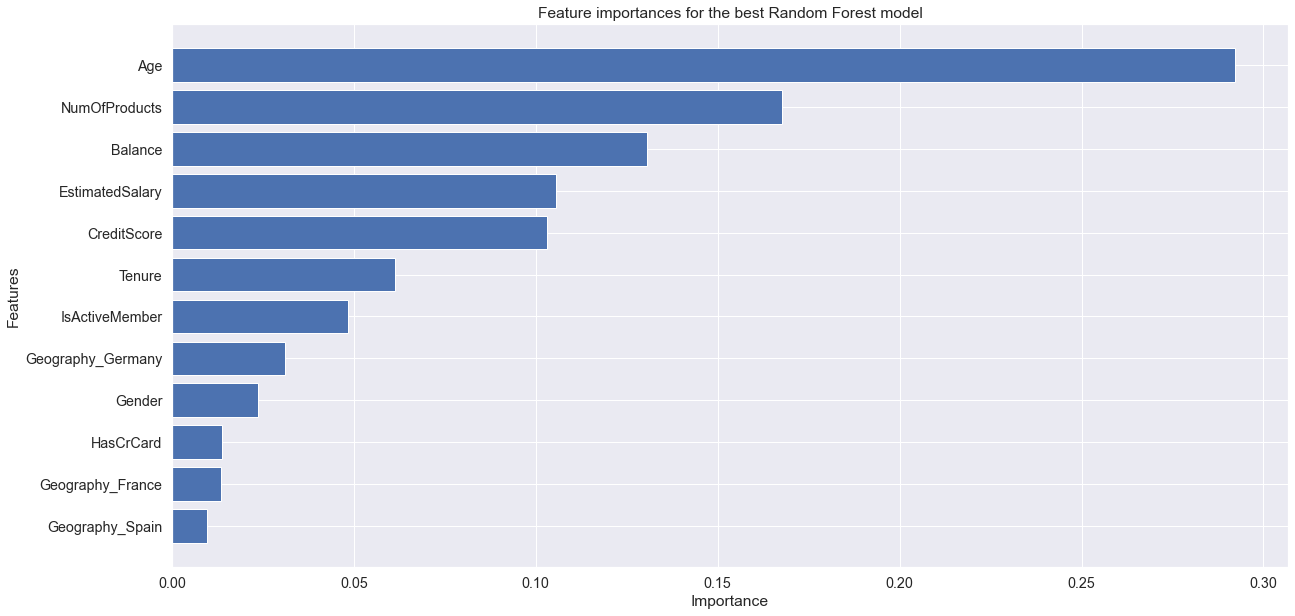

In [101]:
importances_df = pd.DataFrame({"Features":rfc.feature_names_in_, "Importance":rfc.feature_importances_})
importances_df.sort_values(by="Importance", ascending=False, inplace=True)
importances_df.head(20)

n = 40
fig, ax = plt.subplots(figsize=(20,10))
ax.barh(importances_df["Features"][:n], importances_df["Importance"][:n])
ax.set(title="Feature importances for the best Random Forest model",
       xlabel="Importance",
       ylabel="Features")
ax.invert_yaxis()

### XGB

In [102]:
xgbc = XGBClassifier(subsample= 0.9, reg_lambda= 0.7,
                    reg_alpha= 0.9, n_estimators= 3000,
                    min_child_weight= 0.0001, max_depth= 6,
                    learning_rate= 0.8585714285714285,
                    gamma= 21.54434690031882,
                    colsample_bytree= 0.7,
                    eval_metric='auc')
xgbc.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7,
              enable_categorical=False, eval_metric='auc',
              gamma=21.54434690031882, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.8585714285714285,
              max_delta_step=0, max_depth=6, min_child_weight=0.0001,
              missing=nan, monotone_constraints='()', n_estimators=3000,
              n_jobs=4, num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0.9, reg_lambda=0.7, scale_pos_weight=1, subsample=0.9,
              tree_method='exact', validate_parameters=1, verbosity=None)

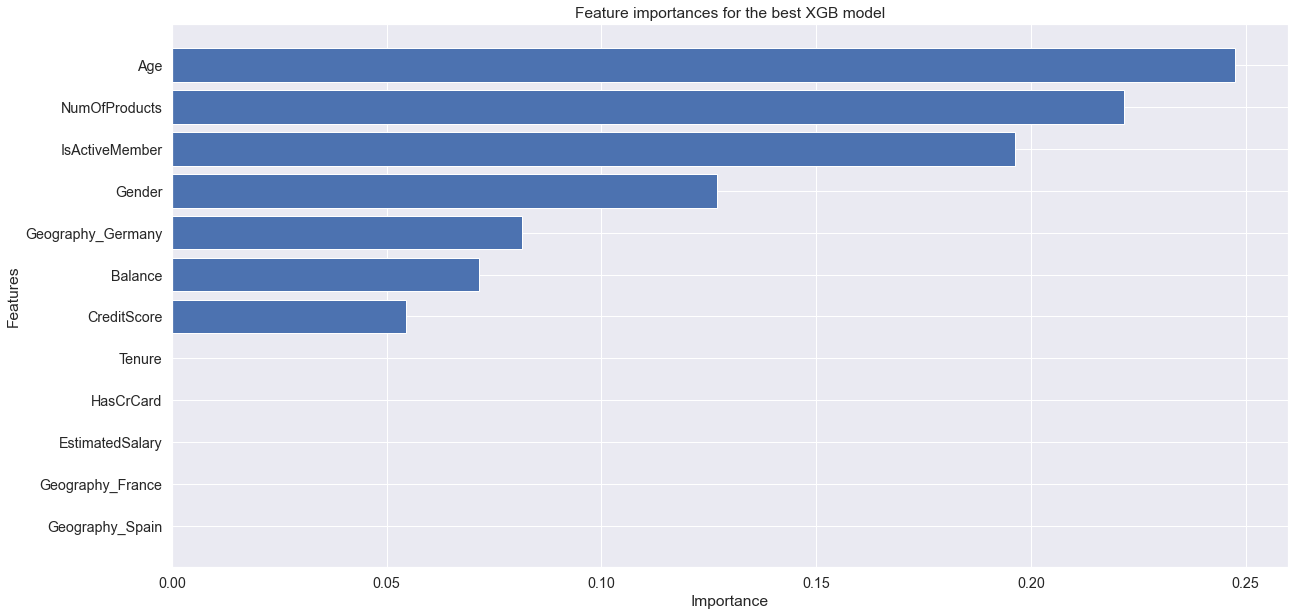

In [111]:
importances_df = pd.DataFrame({"Features":xgbc.get_booster().feature_names, "Importance":xgbc.feature_importances_})
importances_df.sort_values(by="Importance", ascending=False, inplace=True)
importances_df.head(20)

n = 40
fig, ax = plt.subplots(figsize=(20,10))
ax.barh(importances_df["Features"][:n], importances_df["Importance"][:n])
ax.set(title="Feature importances for the best XGB model",
       xlabel="Importance",
       ylabel="Features")
ax.invert_yaxis()

### LGBM

In [ ]:
opt_lgbmc_best_params_ = {'subsample_freq': 10,
                          'subsample': 0.55,
                           'objective': 'binary',
                           'num_leaves': 36,
                           'n_estimators': 3000,
                           'min_child_weight': 0.0001,
                           'min_child_samples': 100,
                           'max_bin': 112,
                           'learning_rate': 0.001,
                           'colsample_bytree': 0.775}

lgbmc = LGBMClassifier(is_unbalance=True, **opt_lgbmc_best_params_)
lgbmc.fit(X_train, y_train)

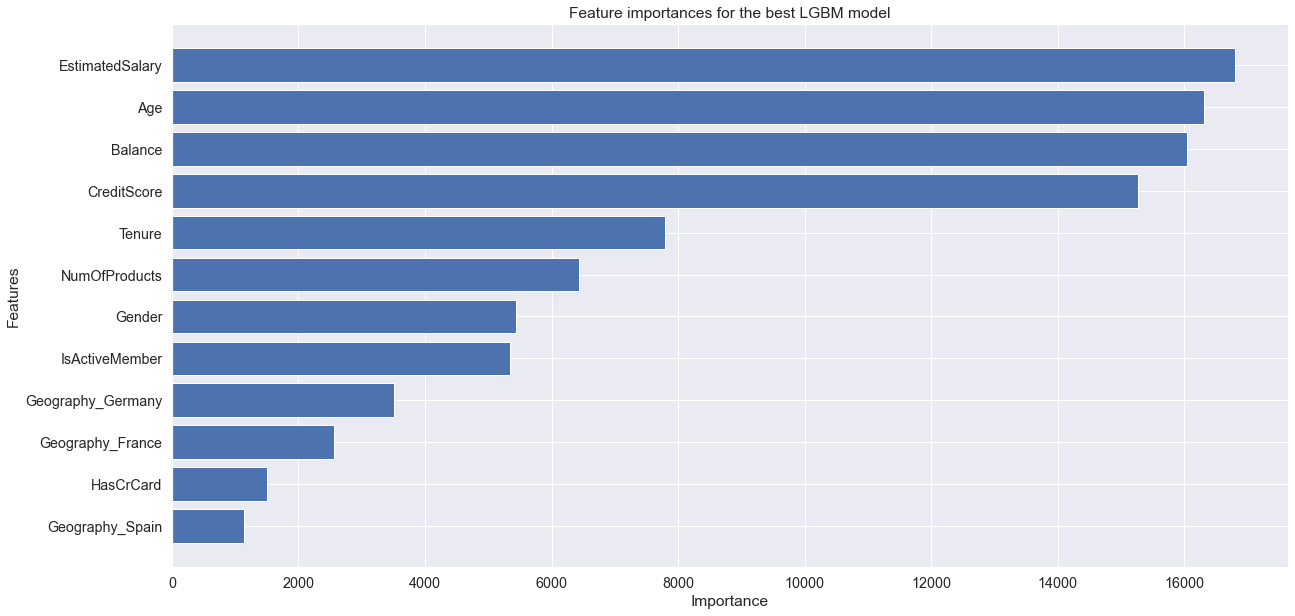

In [99]:
importances_df = pd.DataFrame({"Features":lgbmc.feature_name_, "Importance":lgbmc.feature_importances_})
importances_df.sort_values(by="Importance", ascending=False, inplace=True)
importances_df.head(20)

n = 40
fig, ax = plt.subplots(figsize=(20,10))
ax.barh(importances_df["Features"][:n], importances_df["Importance"][:n])
ax.set(title="Feature importances for the best LGBM model",
       xlabel="Importance",
       ylabel="Features")
ax.invert_yaxis()

Above we can see that our model gives a high importance to features as `EstimatedSalary`, `Age`, `Balance` and `CreditScore`. From the EDA that we performed previously we could see some interesting yet not conclusive relationships such as age-churning status or balance-churning status. It seems that these relationships have been caught by our model. However, other relationships, such as estimated salary-churning status or credit score-churning status, did not provide any visible discrimination in the EDA, yet our model found some patterns from these feautures that allow for a better separation of the classes.

## 8. Conclusions

1. The potential churner population are the women in Germany, with about 45% leaving the bank.
2. According to the data all the accounts from Germany have non-zero balance, unlike Spain and France. It is needed to investigate further if this is a strict policy of the bank in Germany or if its related to cultural affairs or any other matter.
3. For this particular dataset, imbalanced-class data-techniques such as oversampling or undersampling have shown not to be superior to native-model techniques to fight class imbalance, such as sample penalization or class penalization.
4. The model obtained has reasured several observations in relationships between features and the target. However, it has also identified importanr patterns in features that in the EDA did not seem highly discriminative.
5. For the business context we are studying in this project it is more important to identify customers that will actually churn (higher true positive rate/recall) than to identify those who will not. Considering this, there is a tolerance for our model to predict as churners customers that will not churn as long as we obtain a higher recall. The bank is expected to take action to prevent the potential churners to leave. If the bank decides to use this model, the incentives or gifts offered, would also go to a little portion the customers that are not potential churners. This is not that bad, as the bank is preventing these customers to become potential churners in the future.

